# Hacktiv8 Phase 1: Non Graded Challenge 1

---

Non-Graded Assignment ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Logistic Regression.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Dataset yang digunakan dalam project ini adalah dataset stroke yang berisi 5110 baris dengan 12 kolom yang diantaranya adalah id, gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, dan stroke. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

Keterangan kolom pada dataset ini adalah:

| Feature           | Description                                                                            |
| ----------------- | -------------------------------------------------------------------------------------- |
| id                | unique identifier                                                                      |
| gender            | "Male", "Female" or "Other"                                                            |
| age               | age of the patient                                                                     |
| hypertension      | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension          |
| heart_disease     | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease |
| ever_married      | "No" or "Yes"                                                                          |
| work_type         | "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"                   |
| Residence_type    | "Rural" or "Urban"                                                                     |
| avg_glucose_level | average glucose level in blood                                                         |
| bmi               | body mass index                                                                        |
| smoking_status    | "formerly smoked", "never smoked", "smokes" or "Unknown"                               |
| stroke            | 1 if the patient had a stroke or 0 if not                                              |


### Objectives

- Lakukan cleaning dan preprocessing terhadap data yang akan dipakai.
- Buat sebuah classification model dengan menggunakan Logistic Regression dengan stroke prediction sebagai target.

## Import Libraries

Pada project ini library yang akan digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **scikit-learn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data Loading

Membuat dataframe bernama **stroke** dari file csv bernama `healthcare-dataset-stroke-data.csv`.

In [2]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Characteristics

In [3]:
stroke.shape

(5110, 12)

Dataframe terdiri dari **5110 rows** dan **12 columns**.

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dataframe ini terdiri dari:
- 3 kolom dengan tipe data **float**
- 4 kolom dengan tipe data **integer**
- 5 kolom dengan tipe data **object**

Dari info ini juga dapat dilihat terdapat missing value pada kolom `bmi`.

In [5]:
stroke.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Dari tabel diatas dapat diketahui beberapa hal, yaitu:
- Distribusi dari kolom `age` dan `bmi` cenderung normal, karena **mean** dan **median** berdekatan.
- Body Mass Index (**BMI**) paling kecil adalah **10.30** dengan yang paling besar adalah **97.60** maka range dari kolom tersebut adalah **87.30**.

## Data Cleansing

### Missing Value

In [6]:
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Terdapat **201 missing value** pada kolom `bmi`.

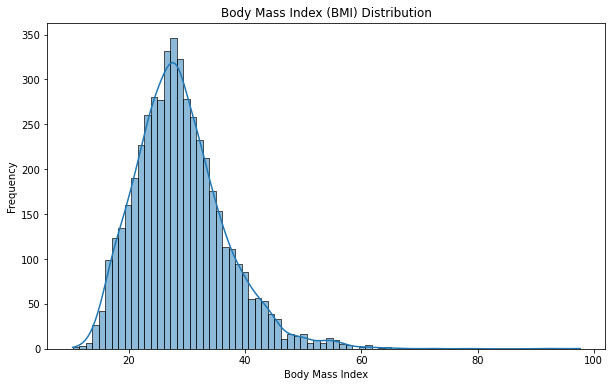

Skewness: 1.0553402052962912


In [7]:
plt.figure(figsize=(10,6))
sns.histplot(x='bmi', data=stroke, kde=True)
plt.title('Body Mass Index (BMI) Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {stroke.bmi.skew()}')

Karena nilai skewness dari kolom `bmi` ini lebih besar dari 1, dapat disimpulkan bahwa distribusi dari kolom `bmi` ini sangat miring. Maka missing value akan diisi oleh nilai **median** dari kolom tersebut.

In [8]:
stroke['bmi'] = stroke['bmi'].fillna(stroke['bmi'].median())

In [9]:
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Setelah missing value diisi dengan nilai mean dari kolom `bmi`, tidak lagi terdapat missing value pada kolom tersebut.

### Duplicate Data

In [10]:
stroke.duplicated().any()

False

Tidak terdapat duplicated data pada dataset.

## Exploratory Data Analysis (EDA)

### Gender

In [11]:
print(f'Number of unique Gender: {stroke.gender.nunique()}')
print(f'Unique Gender: {stroke.gender.unique()}')

Number of unique Gender: 3
Unique Gender: ['Male' 'Female' 'Other']


In [12]:
stroke.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

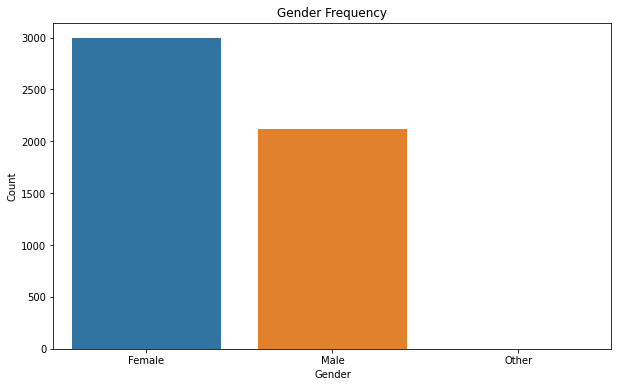

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=stroke, order=stroke.gender.value_counts().sort_values(ascending=False).index)
plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender paling banyak muncul di dataset adalah pasien yang bergender **female** yang berjumlah **2994 pasien**, sedangkan pasien yang bergender **male** ada sebanyak **2155 pasien**. Pada dataset juga terdapat **1 pasien** yang memiliki gender **other**.

### Age

In [14]:
print(f'Number of unique Age: {stroke.age.nunique()}')
print(f'Min Age: {stroke.age.min()}')
print(f'Max Age: {stroke.age.max()}')

Number of unique Age: 104
Min Age: 0.08
Max Age: 82.0


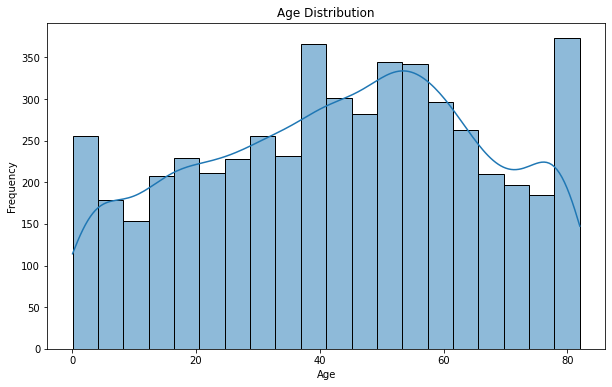

Skewness: -0.1370593225984694


In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=stroke, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {stroke.age.skew()}')

Terdapat **104** usia yang berbeda pada dataset dengan usia paling rendah adalah **0.08 tahun** dan yang paling tinggi yaitu **82 tahun**. Distribusi dari kolom `age` ini juga cenderung normal karena nilai skewnessnya berada diantara -0.5 dan 0.5.

### Hypertension

In [16]:
stroke.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [17]:
stroke.groupby(['hypertension', 'stroke']).id.count()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: id, dtype: int64

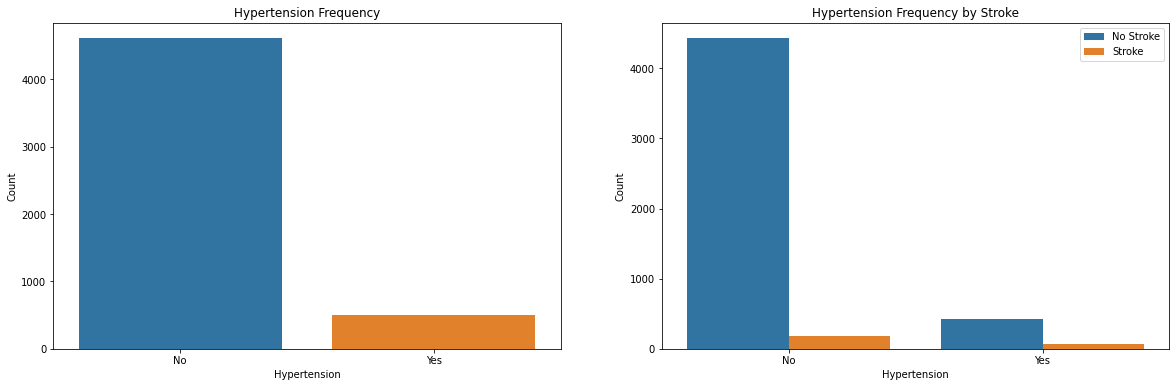

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='hypertension', data=stroke, order=stroke.hypertension.value_counts().sort_values(ascending=False).index)
plt.title('Hypertension Frequency')
plt.xlabel('Hypertension')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='hypertension', data=stroke, order=stroke.hypertension.value_counts().sort_values(ascending=False).index, hue='stroke')
plt.title('Hypertension Frequency by Stroke')
plt.xlabel('Hypertension')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

Ada **498 pasien** yang memiliki hipertensi dan **66 pasien** diantaranya memiliki penyakit stroke.

### Heart Disease

In [19]:
stroke.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [20]:
stroke.groupby(['heart_disease', 'stroke']).id.count()

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
Name: id, dtype: int64

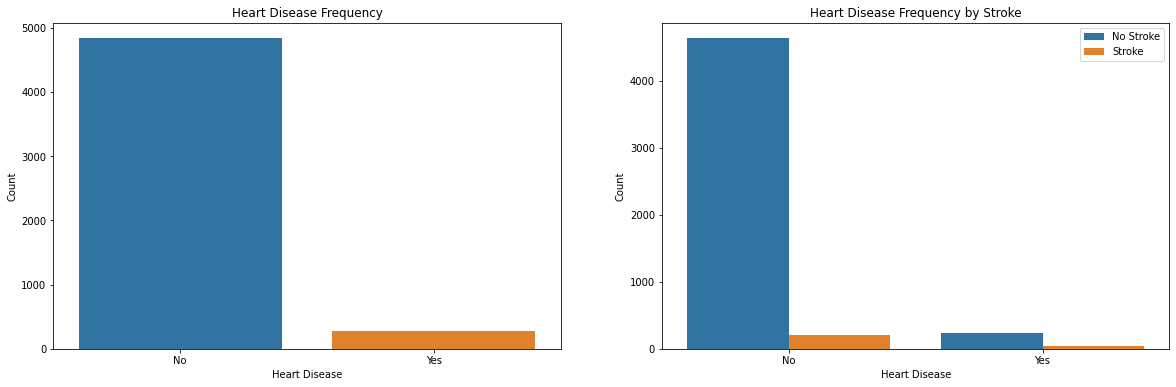

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='heart_disease', data=stroke, order=stroke.heart_disease.value_counts().sort_values(ascending=False).index)
plt.title('Heart Disease Frequency')
plt.xlabel('Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='heart_disease', data=stroke, order=stroke.heart_disease.value_counts().sort_values(ascending=False).index, hue='stroke')
plt.title('Heart Disease Frequency by Stroke')
plt.xlabel('Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

Ada **276 pasien** yang memiliki penyakit jantung dan **47 pasien** diantaranya memiliki penyakit stroke.

### Married

In [22]:
stroke.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

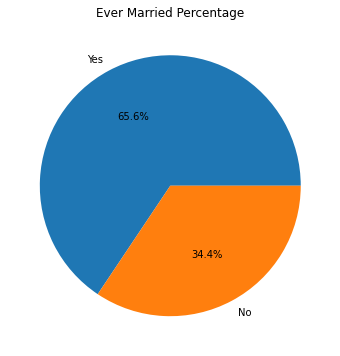

In [23]:
plt.figure(figsize=(10, 6))
plt.pie(stroke.ever_married.value_counts(), labels=stroke.ever_married.value_counts().index, autopct='%1.1f%%')
plt.title('Ever Married Percentage')
plt.show()

Pada dataset **3353** atau sekitar **65%** pasien sudah menikah.

### Work Type

In [24]:
print(f'Number of unique Work Type: {stroke.work_type.nunique()}')
print(f'Unique Work Type: {stroke.work_type.unique()}')

Number of unique Work Type: 5
Unique Work Type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [25]:
stroke.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

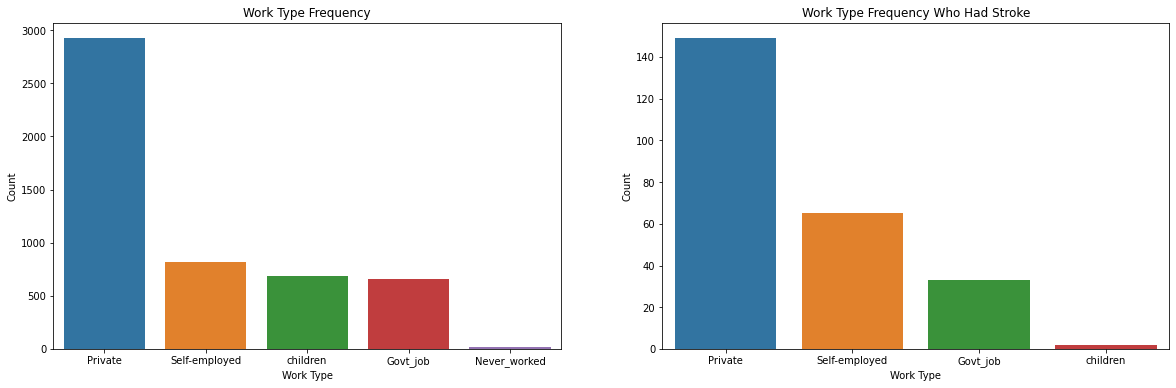

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='work_type', data=stroke, order=stroke.work_type.value_counts().sort_values(ascending=False).index)
plt.title('Work Type Frequency')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='work_type', data=stroke[stroke.stroke == 1], order=stroke[stroke.stroke == 1].work_type.value_counts().sort_values(ascending=False).index)
plt.title('Work Type Frequency Who Had Stroke')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

Pekerjaan paling banyak muncul di dataset ada **private** yang mana pekerjaan ini juga yang paling banyak memiliki pasien dengan penyakit stroke, lalu diikuti oleh pasien dengan pekerjaan **self-employed**.

### Residence Type

In [27]:
print(f'Number of unique Residence Type: {stroke.Residence_type.nunique()}')
print(f'Unique Residence Type: {stroke.Residence_type.unique()}')

Number of unique Residence Type: 2
Unique Residence Type: ['Urban' 'Rural']


In [28]:
stroke.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

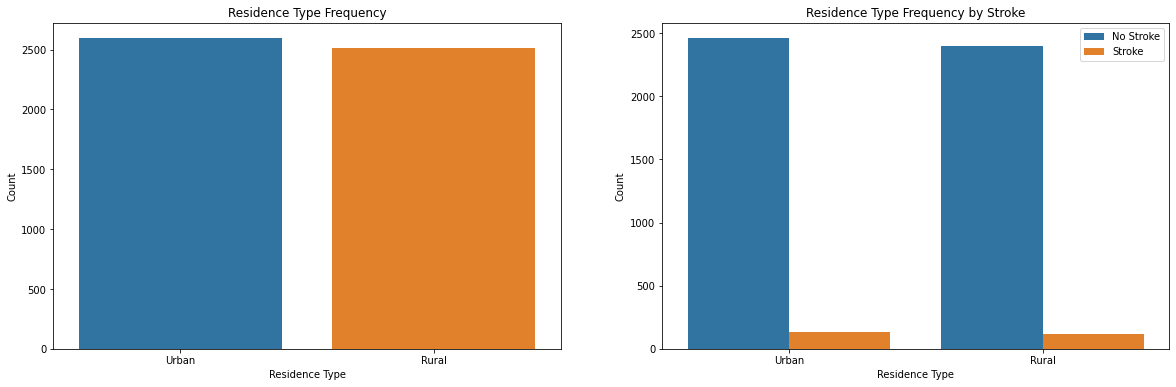

In [29]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Residence_type', data=stroke, order=stroke.Residence_type.value_counts().sort_values(ascending=False).index)
plt.title('Residence Type Frequency')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='Residence_type', data=stroke, order=stroke.Residence_type.value_counts().sort_values(ascending=False).index, hue='stroke')
plt.title('Residence Type Frequency by Stroke')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

Dari hasil plot diatas perbedaan pasien dengan penyakit stroke yang tinggal pada wilayah pedesaan (**Rural**) dan wilayah perkotaan (**Urban**) tidak terlalu signifikan. Jadi dapat diasumsikan bahwa wilayah tempat tinggal tidak mempengaruhi apakah seseorang memiliki penyakit stroke atau tidak.

### Average Glucose Level

In [30]:
print(f'Average Glucose Level: {stroke.avg_glucose_level.mean()}')
print(f'Median Glucose Level: {stroke.avg_glucose_level.median()}')
print(f'Minimum Glucose Level: {stroke.avg_glucose_level.min()}')
print(f'Maximum Glucose Level: {stroke.avg_glucose_level.max()}')

Average Glucose Level: 106.1476771037182
Median Glucose Level: 91.88499999999999
Minimum Glucose Level: 55.12
Maximum Glucose Level: 271.74


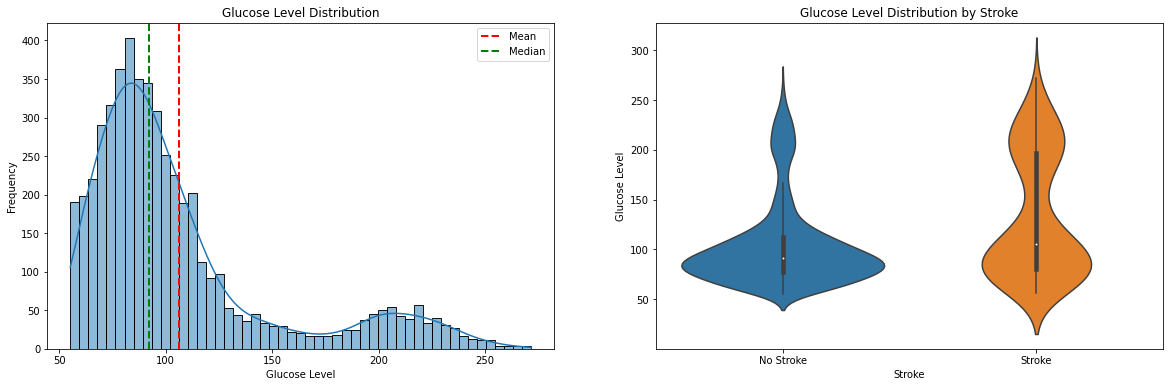

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='avg_glucose_level', data=stroke, kde=True)
plt.axvline(stroke.avg_glucose_level.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(stroke.avg_glucose_level.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Glucose Level Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.violinplot(x='stroke', y='avg_glucose_level', data=stroke)
plt.title('Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel('Glucose Level')
plt.show()

Distribusi dari kolom `avg_glucose_level` ini **Right-Skewed** dengan mean sekitar 106 dan median 91.88. Sedangkan distribusi dari `avg_glucose_level` untuk pasien yang memiliki penyakit stroke juga cenderung Right-Skewed atau mungkin memiliki dua puncak (**Bimodal**) yang mana puncak pertamanya ada di kisaran 90 dan puncak kedua ada di kisaran 200.

### Body Mass Index (BMI)

In [32]:
print(f'Average Body Mass Index (BMI): {stroke.bmi.mean()}')
print(f'Median Body Mass Index (BMI): {stroke.bmi.median()}')
print(f'Minimum Body Mass Index (BMI): {stroke.bmi.min()}')
print(f'Maximum Body Mass Index (BMI): {stroke.bmi.max()}')

Average Body Mass Index (BMI): 28.862035225048924
Median Body Mass Index (BMI): 28.1
Minimum Body Mass Index (BMI): 10.3
Maximum Body Mass Index (BMI): 97.6


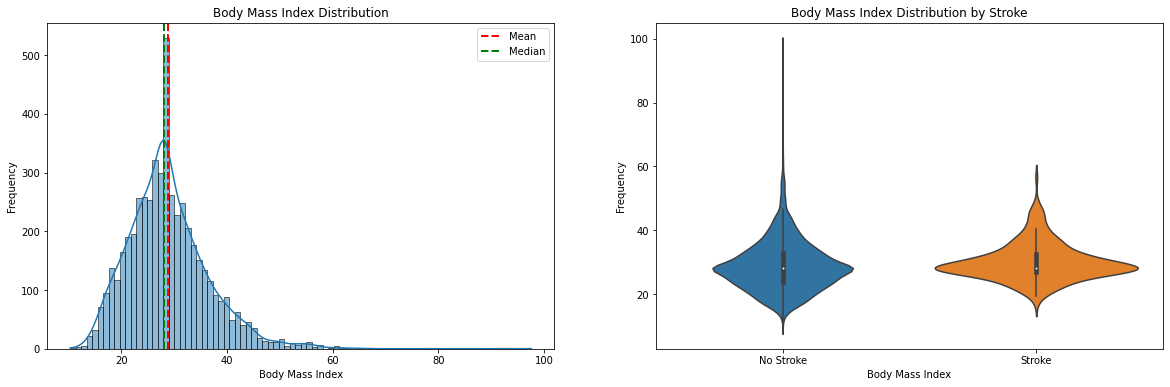

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=stroke, kde=True)
plt.axvline(stroke.bmi.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(stroke.bmi.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.violinplot(x='stroke', y='bmi', data=stroke)
plt.title('Body Mass Index Distribution by Stroke')
plt.xlabel('Body Mass Index')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel('Frequency')
plt.show()

In [34]:
print(f'BMI Skewness: {stroke.bmi.skew()}')
print(f'BMI Where Stroke: {stroke.bmi[stroke.stroke == 1].skew()}')
print(f'BMI Where No Stroke: {stroke.bmi[stroke.stroke == 0].skew()}')

BMI Skewness: 1.0881872326442346
BMI Where Stroke: 1.1275651326762677
BMI Where No Stroke: 1.095903631197483


Kolom `bmi` baik untuk pasien yang memiliki penyakit stroke, tidak memiliki penyakit stroke, atau pun secara keseluruhan ini memiliki distribusi yang **Right-Skewed** karena nilai skewness dari ketiga distribusi ini lebih dari 1. Dari plot diatas juga dapat dilihat terdapat outlier pada kolom `bmi` ini.

### Smoking Status

In [35]:
print(f'Number of unique Smoking Status: {stroke.smoking_status.nunique()}')
print(f'Unique Smoking Status: {stroke.smoking_status.unique()}')

Number of unique Smoking Status: 4
Unique Smoking Status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [36]:
stroke.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

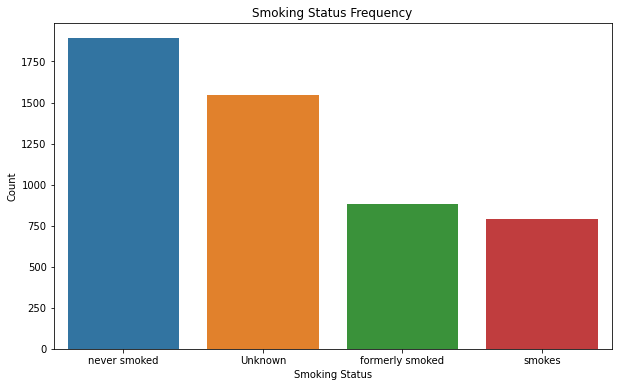

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', data=stroke, order=stroke.smoking_status.value_counts().sort_values(ascending=False).index)
plt.title('Smoking Status Frequency')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

Pada dataset kebanyakan pasien tidak pernah merokok dengan jumlah pasien sebanyak **1892**.

### Stroke

In [38]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Ada **249** pasien yang memiliki penyakit stroke, sedangkan **4861** sisanya tidak memiliki penyakit stroke. 

In [39]:
print(f'Average age with stroke: {round(stroke.age[stroke.stroke == 1].mean())}')
print(f'Average age without stroke: {round(stroke.age[stroke.stroke == 0].mean())}')

Average age with stroke: 68
Average age without stroke: 42


In [40]:
print(f'Average Glucose Level with stroke: {round(stroke.avg_glucose_level[stroke.stroke == 1].mean())}')
print(f'Average Glucose Level without stroke: {round(stroke.avg_glucose_level[stroke.stroke == 0].mean())}')

Average Glucose Level with stroke: 133
Average Glucose Level without stroke: 105


Dapat dilihat rata-rata usia pasien yang memiliki penyakit stroke adalah **68 tahun** dan rata-rata dari gula darah pasien yang memiliki penyakit stroke adalah **133 mg/dl** dimana ini dapat digolongkan tinggi, hal ini mungkin terjadi karena kadar gula darah yang tinggi dapat menyebabkan penyumbatan pembuluh darah yang mengakibatkan terjadinya stroke.

Jadi, dapat disimpulkan bahwa kebanyakan dari pasien yang memiliki penyakit stroke adalah **pasien lanjut usia dengan gula darah tinggi**. 

## Data Preprocessing

Memisahkan feature dengan targetnya, dimana:
- **data** adalah data yang berisi semua value dari setiap kolom
- **label** adalah data yang berisi value dari kolom `stroke`

Kolom `id` tidak masuk ke dalam variable `data` karena tidak akan digunakan dalam pemodelan. 

In [41]:
data = stroke.drop(columns=['stroke', 'id'])
label = stroke.stroke

### Get Inference Data

In [42]:
data_inf = stroke.sample(10, random_state=234)
data_inf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1203,38255,Male,21.0,0,0,No,Private,Urban,82.71,20.1,formerly smoked,0
2687,47405,Female,2.0,0,0,No,children,Rural,100.66,18.5,Unknown,0
132,69551,Male,69.0,1,0,No,Private,Rural,182.99,36.5,never smoked,1
923,72020,Male,71.0,0,1,Yes,Self-employed,Rural,207.32,32.4,smokes,0
62,65842,Female,67.0,1,0,Yes,Self-employed,Rural,61.94,25.3,smokes,1
1089,69143,Female,45.0,0,0,No,Private,Rural,153.76,36.7,Unknown,0
3025,56311,Female,16.0,0,0,No,Private,Rural,81.92,22.7,Unknown,0
2598,57086,Female,52.0,0,0,Yes,Private,Urban,126.68,28.1,never smoked,0
3383,52234,Female,72.0,0,0,Yes,Govt_job,Urban,104.05,33.5,never smoked,0
2600,44112,Female,51.0,0,0,Yes,Self-employed,Urban,219.92,33.5,formerly smoked,0


In [43]:
stroke  = stroke.drop(data_inf.index)

In [44]:
stroke.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Split Data

In [45]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, random_state=234)

### Splitting Columns

In [46]:
num_cols = data_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_cols = data_train.select_dtypes(include=['object']).columns.to_list()

In [47]:
print(f'Numerical Columns: {num_cols}')
print(f'Categorical Columns: {cat_cols}')

Numerical Columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Categorical Columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [48]:
data_train_num = data_train[num_cols]
data_train_cat = data_train[cat_cols]

data_test_num = data_test[num_cols]
data_test_cat = data_test[cat_cols]

### Feature Scaling

In [49]:
scaler = MinMaxScaler()

In [50]:
data_train_num_scaled = scaler.fit_transform(data_train_num)
data_test_num_scaled = scaler.transform(data_test_num)

In [51]:
data_train_num_scaled = pd.DataFrame(data_train_num_scaled, columns=num_cols)
data_test_num_scaled = pd.DataFrame(data_test_num_scaled, columns=num_cols)

### Feature Encoding

In [52]:
encoder = OneHotEncoder()

In [53]:
data_train_cat_encoded = encoder.fit_transform(data_train_cat)
data_test_cat_encoded = encoder.transform(data_test_cat)

In [54]:
data_train_cat_encoded = pd.DataFrame(data_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

In [55]:
data_test_cat_encoded = pd.DataFrame(data_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

#### Train

In [56]:
data_train_cat_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [57]:
data_train_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
2502,Male,Yes,Self-employed,Urban,never smoked
1817,Male,Yes,Private,Rural,formerly smoked
363,Female,No,children,Urban,Unknown
1824,Female,No,children,Urban,Unknown
1154,Female,No,Private,Urban,never smoked


#### Test

In [58]:
data_test_cat_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [59]:
data_test_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
1203,Male,No,Private,Urban,formerly smoked
2687,Female,No,children,Rural,Unknown
132,Male,No,Private,Rural,never smoked
923,Male,Yes,Self-employed,Rural,smokes
62,Female,Yes,Self-employed,Rural,smokes


### Concate Data

In [60]:
data_train = pd.concat([data_train_num_scaled, data_train_cat_encoded], axis=1)
data_test = pd.concat([data_test_num_scaled, data_test_cat_encoded], axis=1)

In [61]:
data_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.926758,0.0,1.0,0.056010,0.203895,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.523926,0.0,0.0,0.037011,0.191294,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.006836,0.0,0.0,0.134970,0.167239,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.096680,0.0,0.0,0.113854,0.056128,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.255371,0.0,0.0,0.267824,0.205040,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [62]:
data_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.255371,0.0,0.0,0.129750,0.112257,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.023438,0.0,0.0,0.214165,0.093929,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.841309,1.0,0.0,0.601345,0.300115,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.865723,0.0,1.0,0.715764,0.253150,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.816895,1.0,0.0,0.032073,0.171821,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model Definition

In [63]:
model = LogisticRegression()

## Model Training

In [64]:
model.fit(data_train, label_train)

LogisticRegression()

## Model Evaluation

In [65]:
model.score(data_test, label_test)

0.9549902152641878

In [66]:
y_pred_train = model.predict(data_train)
y_pred_test = model.predict(data_test)

print(f'Accuracy on training set: {accuracy_score(label_train, y_pred_train)}')
print(f'Accuracy on test set: {accuracy_score(label_test, y_pred_test)}')

Accuracy on training set: 0.9503424657534246
Accuracy on test set: 0.9549902152641878
